In [2]:
import rosbag
from std_msgs.msg import String  # or whatever type your topic uses
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import pandas as pd
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [ ]:
time = []
lat_ofset = []
long_offset = []
with rosbag.Bag('/home/moji/rosbags/vehicle_following/2023-10-13-11-57-27.bag', 'r') as bag:
    for topic, msg, t in bag.read_messages(topics=['/radar_fc/parsed_tx/radarvalid1']):
        time.append(msg.header.stamp.secs + msg.header.stamp.nsecs*1e-9)
        lat_ofset.append(msg.pose.position.y)
        long_offset.append(msg.pose.position.x)

In [ ]:
header = ['time', 'lat', 'long']
df = pd.DataFrame({
    'time': time,
    'lat': lat_ofset,
    'long': long_offset
})

df.to_csv('raw_data.csv', index=False)

In [ ]:
df

In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [ ]:

plt.plot(time, lat_ofset, time[window-1:], moving_average(lat_ofset, window))
plt.savefig('moving_average')

In [ ]:
plt.plot(time, lat_ofset, time, gaussian_filter(lat_ofset, sigma=10))
plt.xlabel('time')
plt.ylabel('lat_ofset') 
plt.legend = ['measurement', 'smoothed']
plt.savefig('Gaussian_filter')

In [ ]:
window = 5
plt.figure(figsize=(20, 10))
plt.plot(time, lat_ofset, 'k-', label='Measured Data')
plt.plot(time, gaussian_filter(lat_ofset, sigma=10), 'r-', label='Gaussian Filter')
plt.plot(time[window-1:], moving_average(lat_ofset, window), 'b-', label='Moving Average')
plt.legend()
plt.title("Lateral Offset Estimation")
plt.xlabel("Time")
plt.ylabel("Lat Offset")
plt.grid(True)
plt.show()
plt.savefig('Traking-lateral.jpg')

In [ ]:
window = 5
plt.figure(figsize=(20, 10))
plt.plot(time, long_offset, 'k-', label='Measured Data')
plt.plot(time, gaussian_filter(long_offset, sigma=10), 'r-', label='Gaussian Filter')
plt.plot(time[window-1:], moving_average(long_offset, window), 'b-', label='Moving Average')
plt.legend()
plt.title("Longitudinal Offset Estimation")
plt.xlabel("Time")
plt.ylabel("Long Offset")
plt.grid(True)
plt.show()
plt.savefig('Traking-longitudinal.jpg')

In [7]:
snr1 = []
range1 = []
range_rate1 = []
angle1 = []
power1 = []
time1 = []
with rosbag.Bag('/home/moji/rosbags/vehicle_following/2023-10-13-11-57-27.bag', 'r') as bag:
    for topic, msg, t in bag.read_messages(topics=['/radar_fc/parsed_tx/radarvalid1']):
        snr1.append(msg.lr_sn)
        angle1.append(msg.lr_angle)
        range1.append(msg.lr_range)
        range_rate1.append(msg.lr_range_rate)
        power1.append(msg.lr_power)
        time1.append(msg.header.stamp.secs + msg.header.stamp.nsecs*1e-9)
       

In [6]:
snr2 = []
range2 = []
range_rate2 = []
angle2 = []
power2 = []
time2 = []
with rosbag.Bag('/home/moji/rosbags/vehicle_following/2023-10-13-11-57-27.bag', 'r') as bag:
    for topic, msg, t in bag.read_messages(topics=['/radar_fc/parsed_tx/radarvalid1']):
        snr2.append(msg.lr_sn)
        angle2.append(msg.lr_angle)
        range2.append(msg.lr_range)
        range_rate2.append(msg.lr_range_rate)
        power2.append(msg.lr_power)
        time2.append(msg.header.stamp.secs + msg.header.stamp.nsecs*1e-9)

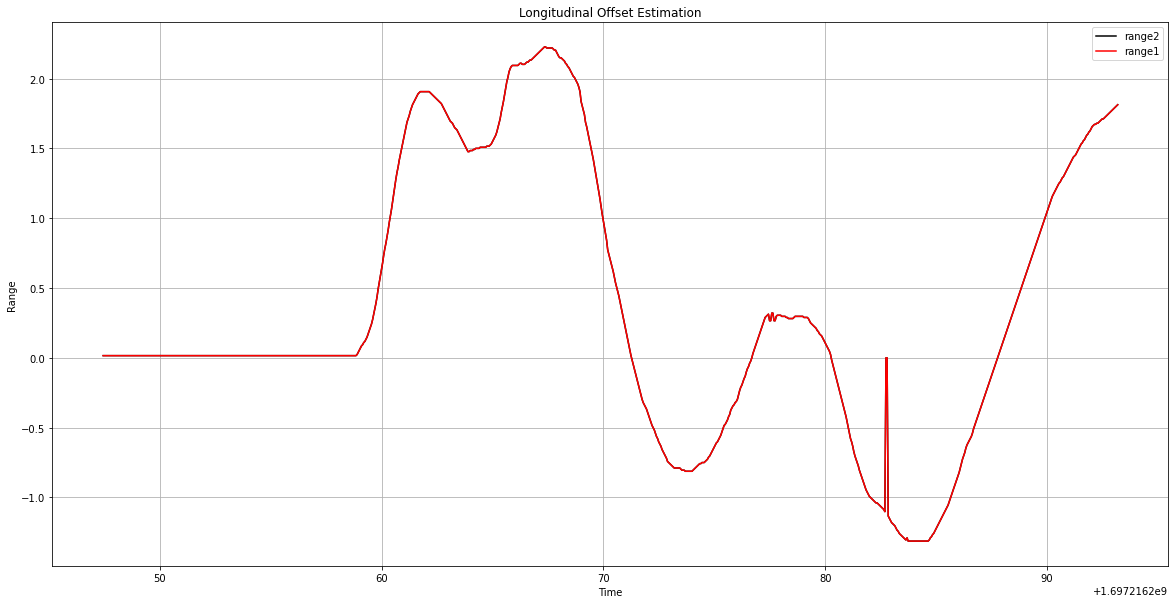

In [10]:
window = 5
plt.figure(figsize=(20, 10))
plt.plot(time2, range_rate2, 'k-', label='range2')
plt.plot(time1, range_rate1, 'r-', label='range1')
# plt.plot(time[window-1:], moving_average(long_offset, window), 'b-', label='Moving Average')
plt.legend()
plt.title("Longitudinal Offset Estimation")
plt.xlabel("Time")
plt.ylabel("Range")
plt.grid(True)
plt.show()